# Questions

1. Exprimez la densité électronique $n_e$ d’un milieu en fonction de sa composition atomique et de
sa masse volumique $\rho$, et calculer ne pour l’eau (liquide) et l’os compact (définition de l'ICRU).
On s’appuiera sur les données du [NIST](https://physics.nist.gov/cgi-bin/Star/compos.pl?ap) pour les compositions atomiques de ces matériaux.

$$n_e = \frac{\rho}{m_u} \sum_i \left( \frac{Z_i}{A_i} \right) w_i$$

où:
- $\rho$ est la masse volumique du matériau (en kg/$\text{m}^3$)
- blabla

In [2]:
def n_e(rho, Zs, As, ws):
    return rho / 1.660539066e-27 * sum([Z/A*w for Z, A, w in zip(Zs, As, ws)])

# Eau liquide
n_e_liquid_water = n_e(1.0, [1, 8], [1.0080, 15.999], [0.111894, 0.888106])
print(f"Eau liquide : {n_e_liquid_water} m^-3")

# Os
n_e_compact_bone = n_e(
    1.85, [1, 6, 7, 8, 12, 15, 16, 20],
    [1.008, 12.011, 14.007, 15.999, 24.305, 30.973762, 32.07, 40.08],
    [0.063984, 0.278000, 0.027000, 0.410016, 0.002000, 0.070000, 0.002000, 0.147000])
print(f"Os compact : {n_e_compact_bone} m^-3")

Eau liquide : 3.3428102885002694e+26 m^-3
Os compact : 5.905836255954329e+26 m^-3


2. Tracez les courbes du pouvoir d’arrêt collisionnel massique pour ces milieux en fonction de
l’énergie cinétique (T). Pour expliciter la dépendance en $T$ de $S_{\text{col}}$, utilisez les relations 9 et
10 ci-bas. Pour le graphique, utilisez une échelle logarithmique en abscisse. Vous trouverez les
énergies moyennes d’excitation $I$ de ces matériaux sur le site du NIST également.

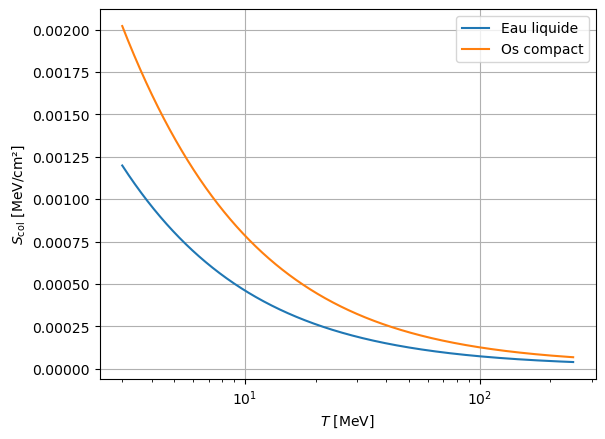

In [31]:
import matplotlib.pyplot as plt
import numpy as np

r_e = 2.8179403227e-15 # m
m_e = 9.1093837139e-31 # kg
m_p = 1.67262192595e-27 # kg
c = 3e8 # m/s
J_in_eV = 1.602176634e-19 # J/eV

def gamma(T):
    return T / (m_p*c**2) + 1

def beta_squared(T):
    return (gamma(T)**2 - 1) / gamma(T)**2

def T_e_max(T): # J
    return 2 * m_e * c**2 * (gamma(T)**2 - 1) / (1 + 2 * gamma(T) * m_e/m_p + (m_e/m_p)**2)

def S_col(T, n_e, I): # [J/m^2]
    term1 = 2*np.pi * r_e**2* m_e * c**2 * n_e / beta_squared(T)
    term2 = np.log(2 * m_e * c**2 * beta_squared(T) * gamma(T)**2 * T_e_max(T) / I**2)
    term3 = 2*beta_squared(T)

    return term1 * (term2 - term3)

kinetic_energy_ev = np.linspace(3e6, 250e6, 10000) # eV
S_col_water = S_col(kinetic_energy_ev*J_in_eV, n_e_liquid_water, 75*J_in_eV) / J_in_eV * 1e-4 / 1e6 # [MeV/cm^2]
S_col_bone = S_col(kinetic_energy_ev*J_in_eV, n_e_compact_bone, 91.9*J_in_eV) / J_in_eV * 1e-4 / 1e6 # [MeV/cm^2]

plt.figure()
plt.plot(kinetic_energy_ev / 1e6, S_col_water, label="Eau liquide")
plt.plot(kinetic_energy_ev / 1e6, S_col_bone, label="Os compact")
plt.xscale("log")
plt.xlabel("$T$ [MeV]")
plt.ylabel("$S_{\\text{col}}$ [MeV/cm²]")
plt.legend()
plt.grid()


# Portée des protons dans la matière